In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [117]:
start_date = '2019-01-01'
end_date = '2022-01-01'

In [118]:
def RSIcalc(asset): #names
    df = yf.download(asset,start=start_date, end = end_date)
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['Price Change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['Price Change'].apply(lambda x: x if x>0 else 0)
    df['Downmove'] = df['Price Change'].apply(lambda x: abs(x) if x<0 else 0)
    df['Avg Up'] = df["Upmove"].ewm(span=19).mean()
    df['Avg Down'] = df["Downmove"].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = (df['Avg Up']/df['Avg Down'])
    df['RSI']= df['RS'].apply(lambda x: 100-(100/(x+1)))
    
    
    
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI']<50), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI']>50), 'Buy'] = 'No'
    return df

In [119]:
stock = 'TSLA'

In [120]:
df = pd.DataFrame()
df = RSIcalc(stock)
df.query('Close > MA200 & RSI < 40')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,Price Change,Upmove,Downmove,Avg Up,Avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2020-02-28,41.980000,46.034668,40.768002,44.532665,44.532665,363343500,22.931283,-0.016215,0.000000,0.016215,0.018359,0.028474,0.644744,39.200273,Yes
2020-03-09,40.359333,44.200001,40.333332,40.533333,40.533333,256105500,23.931340,-0.135725,0.000000,0.135725,0.016999,0.034018,0.499700,33.319983,Yes
2020-03-11,42.680000,43.571999,40.866669,42.282001,42.282001,199837500,24.229153,-0.017200,0.000000,0.017200,0.019295,0.029275,0.659096,39.726211,Yes
2020-03-12,38.726002,39.633331,36.416668,37.369999,37.369999,283636500,24.353103,-0.116172,0.000000,0.116172,0.017365,0.037965,0.457412,31.385211,Yes
2020-03-13,39.666668,40.504665,33.466667,36.441334,36.441334,339604500,24.472023,-0.024851,0.000000,0.024851,0.015629,0.036653,0.426400,29.893423,Yes
2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500,24.557640,-0.185778,0.000000,0.185778,0.014066,0.051566,0.272779,21.431759,Yes
2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000,24.639320,-0.033410,0.000000,0.033410,0.012659,0.049750,0.254460,20.284429,Yes
2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500,24.778083,0.183877,0.183877,0.000000,0.028642,0.054729,0.523343,34.354888,Yes
2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500,24.855063,-0.000257,0.000000,0.000257,0.025778,0.049281,0.523070,34.343117,Yes


In [121]:
def tellers(df):
    Buying_dates = []
    Selling_dates =[]
    
    for i in range(len(df)):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i + j] > 60:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j==10:
                    Selling_dates.append(df.iloc[i+j+1].name)
            
                    
    return Buying_dates, Selling_dates    

In [122]:
frame = RSIcalc(stock)
Buy, Sell = tellers(frame)

[*********************100%***********************]  1 of 1 completed


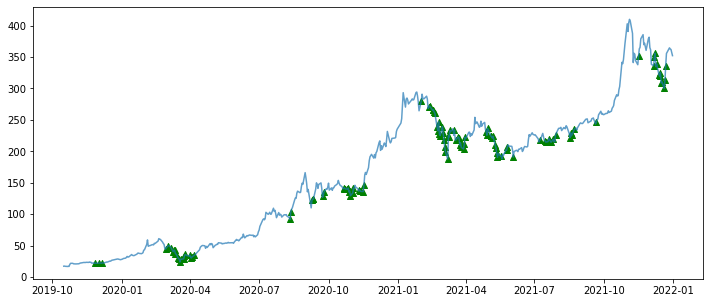

In [123]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[Buy].index , frame.loc[Buy]['Adj Close'], marker='^',c='g')
plt.plot(frame['Adj Close'], alpha=0.7)

In [124]:
Profits = (frame.loc[Sell].Open.values - frame.loc[Buy].Open.values)/(frame.loc[Buy].Open.values)

In [134]:
Profits

array([ 6.26963378e-02,  6.82453886e-02,  5.03881682e-02, -5.51055653e-02,
       -3.39903826e-01, -3.64927541e-01, -2.83767458e-01, -2.76193112e-01,
       -1.48313069e-01, -5.76701309e-02, -1.51260499e-01,  8.68158087e-02,
        1.39178713e-01,  2.95629806e-01,  1.62711116e-01,  1.78966810e-01,
        1.41839485e-01,  1.64145328e-02,  1.77376567e-01,  2.26867337e-01,
        1.58312105e-01,  1.54460084e-01,  1.54011490e-01,  9.59183829e-02,
        2.33510945e-01,  1.38940007e-01,  1.51673080e-01,  1.58301229e-01,
        7.09584325e-02,  1.87366892e-02, -3.08201150e-02,  3.38043468e-02,
        6.77063831e-02, -8.66052268e-03, -7.19927053e-05,  1.24158735e-02,
        9.70753750e-03,  3.78934226e-02,  1.23105509e-01,  7.65998178e-02,
        8.02312277e-02,  9.12741897e-02,  9.63979138e-02, -2.56861755e-02,
        7.70364522e-02, -1.38397901e-01, -1.38719027e-01, -1.21907059e-01,
       -1.16931246e-01, -1.60199707e-01, -2.12503167e-01, -2.12538021e-01,
       -8.14794837e-02, -

In [126]:
Comisiones = 0.0025

In [136]:
dfr = pd.DataFrame()
dfr['Rendimientos'] = Profits
dfr['Utilidad'] = dfr['Rendimientos']-Comisiones

capital = 1000000
Monto = [1000000]



for i in range(len(dfr)):
    valor = Monto[-1]*(1+dfr['Rendimientos'][i])
    Monto.append(valor)
    
del Monto[0]
    
dfr['Monto'] = np.round(Monto,3)
dfr

,Rendimientos,Utilidad,Monto
0,0.062696,0.060196,1062696.338
1,0.068245,0.065745,1135220.462
2,0.050388,0.047888,1192422.142
3,-0.055106,-0.057606,1126713.046
4,-0.339904,-0.342404,743738.971
...,...,...,...
111,0.079608,0.077108,2110471.942
112,0.173705,0.171205,2477071.235
113,0.178950,0.176450,2920343.755
114,0.171017,0.168517,3419771.318


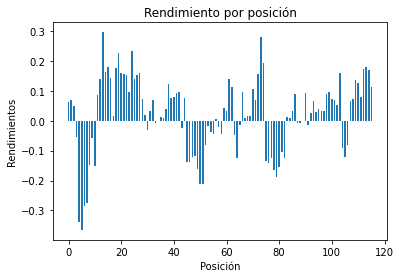

In [128]:
plt.bar(dfr.index, dfr.Rendimientos,width=0.6)
plt.xlabel("Posición")
plt.ylabel("Rendimientos")
plt.title("Rendimiento por posición")
plt.show()

In [129]:
wins = [i for i in Profits if i > 0]

In [130]:
len(wins)/len(Profits)

0.6379310344827587

In [131]:
impuestos = 0.1
ultimo = dfr[['Monto']].iloc[-1]
ultimo = ultimo * (1-impuestos)
np.round(ultimo,3)

Monto    3422048.662
Name: 115, dtype: float64

In [132]:
(ultimo - capital) / capital

Monto    2.422049
Name: 115, dtype: float64